# Lab 2: Random Processes

ISC 4221 <br>
September 25th, 2019 <br>
Connor Poetzinger

## Random Number generator 

### Uniform Random Cordinates 

Generate 10,000 uniform random cordinates, store then in an array, and plot them.

Text(0.5, 0, 'X')

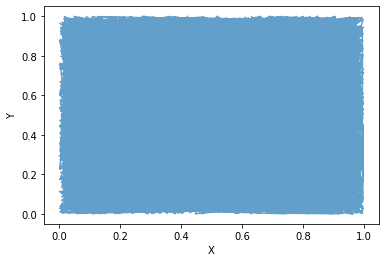

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#initialize uniform random variables for x and y 
x = np.random.uniform(0, 1, 10000)
y = np.random.uniform(0, 1, 10000)

#plot random coordinates 
plt.plot(x, y, alpha = 0.7); plt.ylabel('Y'); plt.xlabel('X')

### Histogram Visuals 

Generate histograms of the random samples and show them in the same plot.

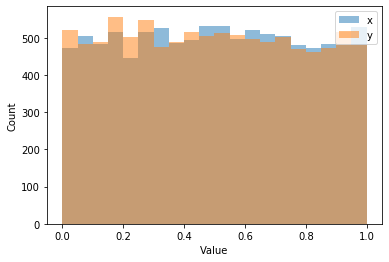

In [4]:
#plot histogram for x and y uniform random numbers 
plt.hist(x, 20, alpha = 0.5, label = 'x')
plt.hist(y, 20, alpha = 0.5, label = 'y')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(loc='upper right')

### Randomness of Samples

Determine the randomness of the samples. Calculate the mean of x and y, and compare the results to the expected value of the two random variables which are both 0.5.

In [5]:
expected_value = 0.5 

x_mean = np.mean(x)
y_mean = np.mean(y)

comp_x = expected_value - x_mean
comp_y = expected_value - y_mean

print('Mean of random sample x: {}\nMean of random sample y: {}'.format(x_mean,y_mean))
print('Expected value minus mean of random sample x: {}\nExpected value minus mean of random sample y: {}'.format(comp_x, comp_y))

Mean of random sample x: 0.5011239101522812
Mean of random sample y: 0.4947094369452401
Expected value minus mean of random sample x: -0.0011239101522811934
Expected value minus mean of random sample y: 0.005290563054759889


In [6]:
def RMSE(arr):
    """
    Inputs:
        arr - array of random points with size Nx2
    Outputs:
        x_mean - mean of X column
        y_mean - mean of Y column 
        calc - the root mean squared error
    """
    #split the array my columns of x and y 
    x = arr[:, 0]
    y = arr[:, 1]
    
    #calculate the mean of x and y 
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    #calculate the mean squared error
    calc = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    
    #format output 
    print("The mean of the first column is {}.\n\n The mean of the second column is: {}.\n\n The root-mean-squared-error is:\n {}".format(x_mean, y_mean, calc))
    
    #return expected values 
    return x_mean, y_mean, calc

In [7]:
#initial vraiables 

#row size for array of Nx2
# N = 10000
#uniform random array of size Nx2
for N in range(10, 10000):
    arr = np.random.uniform(size=(N, 2))

#call RMSE function 
x_mean, y_mean, rmse = RMSE(arr)

The mean of the first column is 0.4997587055502935.

 The mean of the second column is: 0.49565182572483535.

 The root-mean-squared-error is:
 [0.63125804 0.62934347 0.30776397 ... 0.43145742 0.47689007 0.42894328]


9999


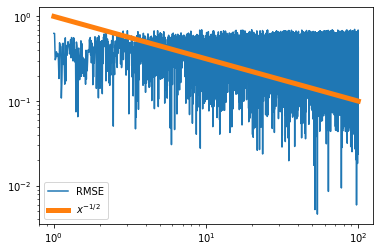

In [8]:
print(N)
x = np.linspace(1, 100, N)
plt.loglog(x, rmse, label='RMSE')
plt.loglog(x, x**(-1/2), linewidth=5,label='$x^{-1/2}$')
plt.legend()

## Monty Hall Problem 

### List All Outcomes 

Assume the contestant picks door 1. Since there are 3 possible locations of the car and two choices (switch or keep), there are a total of 3*2 = 6 outcomes. List all six outcomes and determine the result for each of them. Calculate the pobability of winning the car for each of the  two strategies (switch or keep). 

In [7]:
data = {'Behind door 1':['Goat', 'Goat', 'Car'], 
        'Behind door 2':['Goat', 'Car', 'Goat'], 
        'Behind door 3':['Car', 'Goal', 'Goat'], 
        'Result if staying at door #1':['Wins goat', 'Wins goat', 'Wins car'], 
        'Result if switching to the door offered':['Wins car', 'Wins car','Wins goat']}

In [8]:
import pandas as pd
df = pd.DataFrame(data)
df

,Behind door 1,Behind door 2,Behind door 3,Result if staying at door #1,Result if switching to the door offered
0,Goat,Goat,Car,Wins goat,Wins car
1,Goat,Car,Goal,Wins goat,Wins car
2,Car,Goat,Goat,Wins car,Wins goat


In [128]:
import random 

def run_test(switch_door, n_doors = 3):
    
    car_door = random.randint(1, n_doors)
    contestant_door = random.randint(1, n_doors)
    
    if switch_door:
        #if the contestant picked door 2 then host reveals door 3. 
        #Else host reveals door 2 
        if contestant_door == 2:
            host_door = 3
        else:
            host_door = 2

        #make the switch by choosing any other door than the 
        #initially selected one and the one just opened to reveal a goat 
        available_doors = [x for x in range(1, n_doors+1) 
                           if x not in (contestant_door, host_door)]
        contestant_door = random.choice(available_doors)
    
    return contestant_door == 1

In [129]:
def run_tests(N, switch_door, n_doors = 3):
    
    #num_wins is the counter. Intialize to 0
    num_wins = 0
    
    #run tests N times 
    for i in range(N):
        #if 
        if run_test(switch_door, n_doors):
            num_wins += 1
    
    #return the number of wins 
    return num_wins

In [130]:
#assign initial conditions
num_door = 3
num_test = 10000

#run tests without and with switch 
num_wins_without_switch = run_tests(num_test, False, num_door)
num_wins_with_switch = run_tests(num_test, True, num_door)

#calculate probability 
prob_without_switch = num_wins_without_switch/num_test
prob_with_switch = num_wins_with_switch/num_test

#report outputs
print("Monty Hall problem with {} doors".format(num_door))
print("Proportion of wins without switching: {:.4}".format(prob_without_switch))
print("Proportion of wins with switching: {:.4}".format(prob_with_switch))

Monty Hall problem with 3 doors
Proportion of wins without switching: 0.323
Proportion of wins with switching: 0.6685
